In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin_cached_model as lcm
import pymc3 as pm
import scipy.io
import scipy as sp

In [2]:
oxy_data37=scipy.io.loadmat('OXY37_MRI_1_ts.mat')

mean:  -1.13130760798e-12
var:  371.985450742
N:  736


(736,)

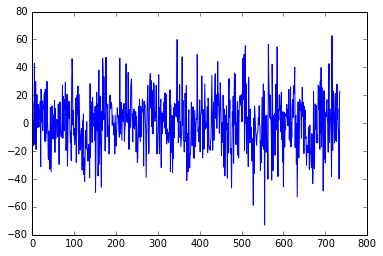

In [3]:
mpfc_r_ts=oxy_data37['mpfc_r_ts']
mpfc=mpfc_r_ts[0]
plt.plot(mpfc)
print("mean: ",mpfc.mean())
print("var: ",mpfc.std()**2)
N=len(mpfc)
print("N: ",N)
mpfc.shape

In [4]:
# initial prior
# both D and A have mean 1 and std 10
alpha_A=400.0/16.0
beta_A=1.0/16.0
alpha_N=400.0/16.0
beta_N=1.0/16.0
alpha_D=2.0+1.0/1.6
beta_D=100*(alpha_D-1)
delta_t=0.802

In [5]:
with pm.Model() as model:
    D = pm.InverseGamma('D', alpha=alpha_D, beta=beta_D)
    A = pm.Gamma('A', alpha=alpha_A, beta=beta_A)
    sN = pm.InverseGamma('sN', alpha=alpha_N, beta=beta_N)

    B = pm.Deterministic('B', pm.exp(-delta_t * D / A))

    path = lcm.Ornstein_Uhlenbeck('path',D=D, A=A, B=B, shape=mpfc.shape)

    X_obs = pm.Normal('X_obs', mu=path, sd=sN, observed=mpfc)
    
    start = pm.find_MAP(fmin=sp.optimize.fmin_powell)
    
    trace = pm.sample(10000,start=start)


Applied log-transform to D and added transformed D_log to model.
Applied log-transform to A and added transformed A_log to model.
Applied log-transform to sN and added transformed sN_log to model.
Assigned NUTS to D_log
Assigned NUTS to A_log
Assigned NUTS to sN_log
Assigned NUTS to path
 [-----------------100%-----------------] 10000 of 10000 complete in 690.6 sec

In [6]:
trace

<MultiTrace: 1 chains, 10000 iterations, 8 variables>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1204feba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1242c40f0>]], dtype=object)

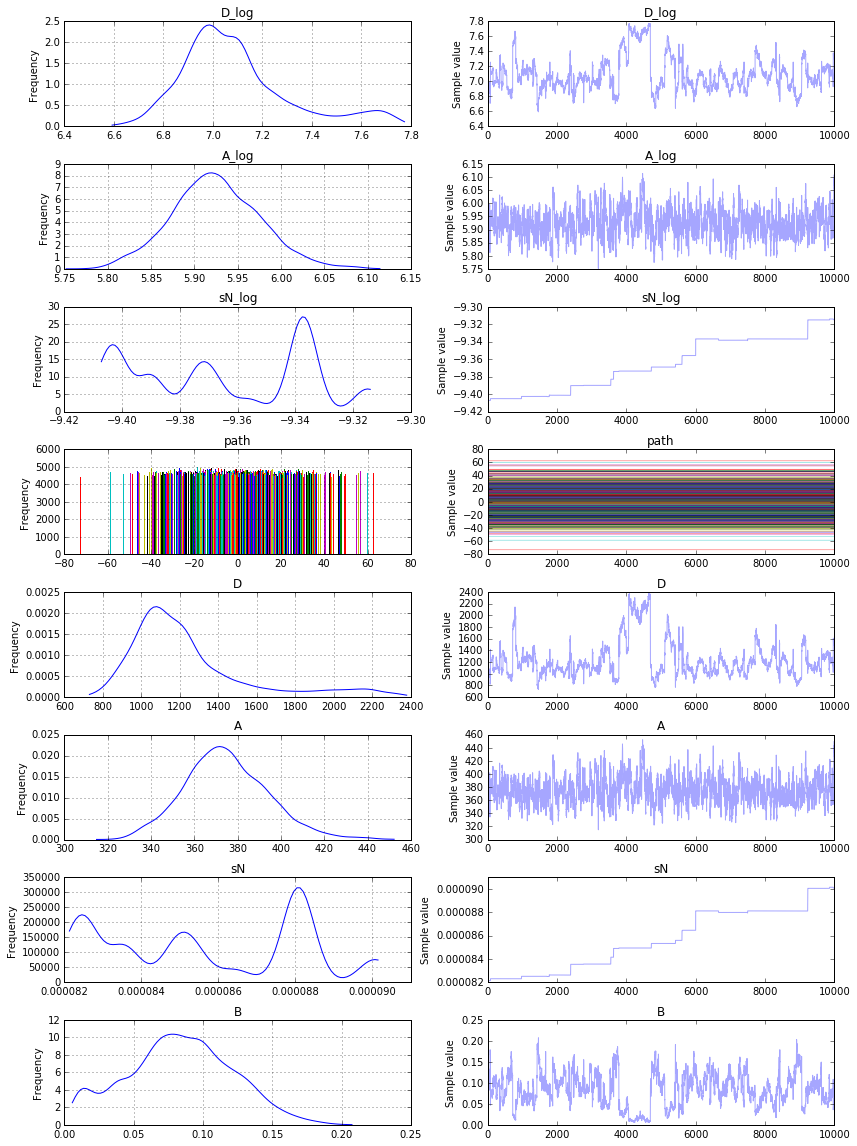

In [7]:
pm.traceplot(trace)

In [8]:
pm.summary(trace)


D_log:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.092            0.227            0.021            [6.749, 7.672]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  6.756          6.944          7.047          7.181          7.683


A_log:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.925            0.051            0.003            [5.818, 6.021]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  5.825          5.891          5.923          5.958          6.030


sN_log:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  7.887            0.000            0.000            [7.887, 7.887]
  14.829           0.000            0.000            [14.829, 14.829]
  -16.043          0.000            0.000            [-16.044, -16.043]
  -11.458          0.000            0.000            [-11.458, -11.458]
  -0.503           0.000            0.000            [-0.503, -0.503]
  42.902           0.000            0.000            [42.902, 42.903]
  -15.251          0.000            0.000            [-15.251, -15.251]
  -14.297          0.000            0.000            [-14.297, -14.297]
  29.793           0.000            0.000            [29.793, 29.793]
  -18.794          0.000            0.000            [-18.794, -18.794]
  9.919            0.000            0.000            [9.919, 9.920]
  20.582           0.000            0.000            [20.582, 20.583]
  0.524    